In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# read the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

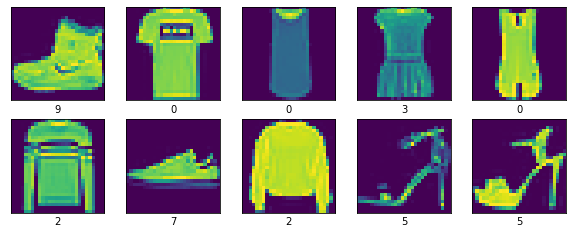

In [3]:
# visualization
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i])

plt.show()

In [0]:
# nomalization
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
x_train.shape
height, width = x_train.shape[1:]
num_labels = len(np.unique(y_train))
num_labels

10

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Build neural network
model = Sequential([
    layers.Flatten(input_shape=(height, width)),

    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=num_labels, activation='softmax')
]) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
epochs = 20
history = model.fit(x_train, y_train, epochs=epochs, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.6189 - accuracy: 0.7885 - val_loss: 0.5011 - val_accuracy: 0.8231
Epoch 2/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.4406 - accuracy: 0.8449 - val_loss: 0.4334 - val_accuracy: 0.8456
Epoch 3/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3968 - accuracy: 0.8595 - val_loss: 0.4386 - val_accuracy: 0.8449
Epoch 4/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3697 - accuracy: 0.8682 - val_loss: 0.3942 - val_accuracy: 0.8577
Epoch 5/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3497 - accuracy: 0.8741 - val_loss: 0.3939 - val_accuracy: 0.8594
Epoch 6/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3338 - accuracy: 0.8800 - val_loss: 0.3974 - val_accuracy: 0.8551
Epoch 7/20
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3201 - accuracy: 0.8842 - val_loss: 0.3734 - val_ac

In [33]:
accuracy = model.evaluate(x_test, y_test)
print('Accuracy', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3524 - accuracy: 0.8725
Accuracy [0.3524259626865387, 0.8725000023841858]
